<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_88/blob/main/Reto_Eq_88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*

### **Semana 9 Reto Parte 1**


####**Curso: Ciencia y analítica de datos (Gpo 10)**

####**11 de Noviembre de 2022**

Equipo: 88

Nombre del estudiante: 


***Dalina Aidee Villa Ocelotl (A01793258)***


***Miguel Guillermo Galindo Orozco (A01793695)***


# Librerías a utilizar

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 662 kB/s 
     |████████████████████████████████| 1.0 MB 44.4 MB/s 
     |████████████████████████████████| 1.7 MB 24.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 32.9 MB/s 
     |████████████████████████████████| 6.3 MB 40.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=c49dc87f5838c77f1067991b9e2ea23f4df3f8bd5f57ac863c74ca60b7437949
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6baa432e1c203ffc7e592d65d8170c2919753ddec81de75abb9cf1ca3741b36e
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [283]:
from sklearn.cluster import KMeans

# Base 1: Aguas Subterraneas

In [4]:
df = pd.read_csv('/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',encoding = "ISO-8859-1")
print(df.shape)
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [5]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [6]:
df[['COLI_FEC_NMP/100_mL','CALIDAD_COLI_FEC','SEMAFORO']]

,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,SEMAFORO
0,<1.1,Potable - Excelente,Verde
1,<1.1,Potable - Excelente,Verde
2,<1.1,Potable - Excelente,Rojo
3,<1.1,Potable - Excelente,Verde
4,291,Aceptable,Rojo
...,...,...,...
1063,<1.1,Potable - Excelente,Rojo
1064,<1.1,Potable - Excelente,Rojo
1065,620,Aceptable,Rojo
1066,<1.1,Potable - Excelente,Verde


# Análisis de Variables

Análisis descriptivo, medidas de tendencia central, y asignación de valores nulos (& limite en caso de ser necesario)

Valoración tipo de dato, valores únicos, y ejemplos del dato

In [7]:
## Iteración por columna para conocer el tipo de dato, valores únicos, y ejemplos del dato
for i in df.columns: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) )

Columna CLAVE es un dato tipo object con 1068 valores únicos. Algunos ejemplos son: ['DLAGU6' 'DLAGU6516' 'DLAGU7' 'DLAGU9' 'DLBAJ107']
Columna SITIO es un dato tipo object con 1066 valores únicos. Algunos ejemplos son: ['POZO SAN GIL' 'POZO R013 CAÑADA HONDA' 'POZO COSIO' 'POZO EL SALITRILLO'
 'RANCHO EL TECOLOTE']
Columna ORGANISMO_DE_CUENCA es un dato tipo object con 13 valores únicos. Algunos ejemplos son: ['LERMA SANTIAGO PACIFICO' 'LERMA SANTIAGO PACIFICO'
 'LERMA SANTIAGO PACIFICO' 'LERMA SANTIAGO PACIFICO'
 'PENINSULA DE BAJA CALIFORNIA']
Columna ESTADO es un dato tipo object con 32 valores únicos. Algunos ejemplos son: ['AGUASCALIENTES' 'AGUASCALIENTES' 'AGUASCALIENTES' 'AGUASCALIENTES'
 'BAJA CALIFORNIA SUR']
Columna MUNICIPIO es un dato tipo object con 452 valores únicos. Algunos ejemplos son: ['ASIENTOS' 'AGUASCALIENTES' 'COSIO' 'RINCON DE ROMOS' 'LA PAZ']
Columna ACUIFERO es un dato tipo object con 273 valores únicos. Algunos ejemplos son: ['VALLE DE CHICALOTE' 'VALLE DE C

Valoración variables con null values

In [8]:
### Iteración por columna para conocer el total de missing values
for i in df.columns: 
  print('Columna ' + str(i) + ' tiene ' +  str(df[i].isna().sum()) +' valores nulos, que representa ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +'% del total' )

Columna CLAVE tiene 0 valores nulos, que representa 0.0% del total
Columna SITIO tiene 0 valores nulos, que representa 0.0% del total
Columna ORGANISMO_DE_CUENCA tiene 0 valores nulos, que representa 0.0% del total
Columna ESTADO tiene 0 valores nulos, que representa 0.0% del total
Columna MUNICIPIO tiene 0 valores nulos, que representa 0.0% del total
Columna ACUIFERO tiene 0 valores nulos, que representa 0.0% del total
Columna SUBTIPO tiene 0 valores nulos, que representa 0.0% del total
Columna LONGITUD tiene 0 valores nulos, que representa 0.0% del total
Columna LATITUD tiene 0 valores nulos, que representa 0.0% del total
Columna PERIODO tiene 0 valores nulos, que representa 0.0% del total
Columna ALC_mg/L tiene 4 valores nulos, que representa 0.38% del total
Columna CALIDAD_ALC tiene 4 valores nulos, que representa 0.38% del total
Columna CONDUCT_mS/cm tiene 6 valores nulos, que representa 0.56% del total
Columna CALIDAD_CONDUC tiene 6 valores nulos, que representa 0.56% del total
C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


## Clave

Identificación del registro. 
De acuerdo a valoraciones previas, no tiene valores únicos ni repetidos.

## SITIO

Variable categórica que identifica el lugar.

No tiene missing values.

In [9]:
df[['SITIO']].groupby('SITIO').size().sort_values(ascending=False)

SITIO
POZO VILLA UNION                                                        2
EL FUERTE                                                               2
POZO LA NANTESANA                                                       1
POZO LAS AMERICAS II (BEBIDAS PURIFICADAS DEL SURESTE, S.A. DE C.V.)    1
POZO LA ZAMORILLA (CNA-72)                                              1
                                                                       ..
PINOS                                                                   1
PLANCHUELAS                                                             1
POPOLA                                                                  1
POZO  NATIVITAS                                                         1
YAXCABA                                                                 1
Length: 1066, dtype: int64

Sólo se repite Pozo Villa Union, y El Fuerte

Los demás, se identifican 1 a 1 con el la variable clave

## ORGANISMO_DE_CUENCA

In [10]:
variable = 'ORGANISMO_DE_CUENCA'

In [11]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) )

Columna ORGANISMO_DE_CUENCA es un dato tipo object con 13 valores únicos. Algunos ejemplos son: ['LERMA SANTIAGO PACIFICO' 'LERMA SANTIAGO PACIFICO'
 'LERMA SANTIAGO PACIFICO' 'LERMA SANTIAGO PACIFICO'
 'PENINSULA DE BAJA CALIFORNIA']


In [12]:
df[[variable]].groupby(variable).size().sort_values(ascending=False)

ORGANISMO_DE_CUENCA
CUENCAS CENTRALES DEL NORTE     232
LERMA SANTIAGO PACIFICO         170
PENINSULA DE YUCATAN            125
NOROESTE                         94
PENINSULA DE BAJA CALIFORNIA     89
BALSAS                           69
RIO BRAVO                        65
PACIFICO NORTE                   62
GOLFO NORTE                      53
AGUAS DEL VALLE DE MEXICO        38
FRONTERA SUR                     34
GOLFO CENTRO                     21
PACIFICO SUR                     16
dtype: int64

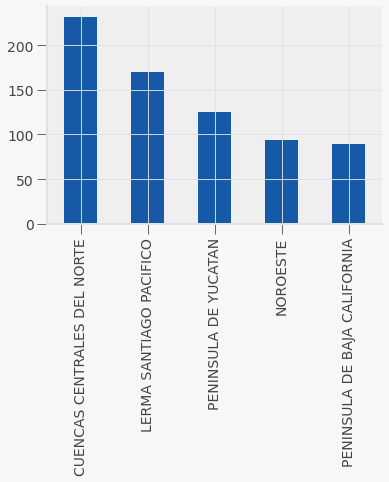

In [13]:
df[variable].value_counts().head(5).plot(kind='bar')

De acuerdo al análisis de la primera sección encontramos que se trata de una variable categórica, con 13 valores distintos, y sin valores nulos.

El valor más repetido es CUENCAS CENTRALES DEL NORTE

## ESTADO

In [14]:
variable = 'ESTADO'

In [15]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna ESTADO es un dato tipo object con 32 valores únicos. Algunos ejemplos son: ['AGUASCALIENTES' 'AGUASCALIENTES' 'AGUASCALIENTES' 'AGUASCALIENTES'
 'BAJA CALIFORNIA SUR'] Y presenta 0.0 % valores nulos


In [16]:
df[[variable]].groupby(variable).size().sort_values(ascending=False)

ESTADO
DURANGO                            121
SONORA                             103
YUCATAN                             85
ZACATECAS                           75
COAHUILA DE ZARAGOZA                59
BAJA CALIFORNIA SUR                 49
SAN LUIS POTOSI                     47
GUANAJUATO                          41
HIDALGO                             37
CHIHUAHUA                           35
JALISCO                             33
SINALOA                             32
BAJA CALIFORNIA                     31
MICHOACAN DE OCAMPO                 27
COLIMA                              26
TAMAULIPAS                          25
CAMPECHE                            25
MEXICO                              24
TLAXCALA                            24
PUEBLA                              23
CHIAPAS                             21
OAXACA                              20
VERACRUZ DE IGNACIO DE LA LLAVE     16
NUEVO LEON                          15
QUINTANA ROO                        15
AGUASCALIENTES    

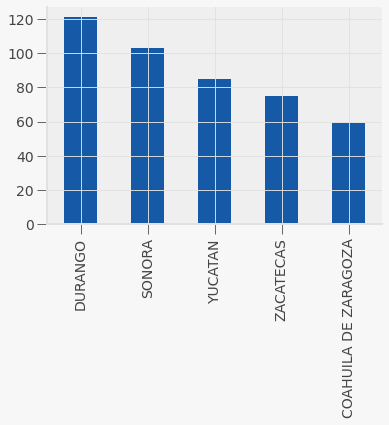

In [17]:
df[variable].value_counts().head(5).plot(kind='bar')

Variable categórica sobre el estado del registro analizado, sin valores nulos. 

El estado más repetido es DURANGO

## MUNICIPIO

In [18]:
variable = 'MUNICIPIO'

In [19]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna MUNICIPIO es un dato tipo object con 452 valores únicos. Algunos ejemplos son: ['ASIENTOS' 'AGUASCALIENTES' 'COSIO' 'RINCON DE ROMOS' 'LA PAZ'] Y presenta 0.0 % valores nulos


In [20]:
df[[variable]].groupby(variable).size().sort_values(ascending=False)

MUNICIPIO
LA PAZ             27
ENSENADA           26
PARRAS             24
HERMOSILLO         17
MERIDA             16
                   ..
REFORMA             1
RINCON DE ROMOS     1
CRUILLAS            1
COYOTEPEC           1
ZINAPECUARO         1
Length: 452, dtype: int64

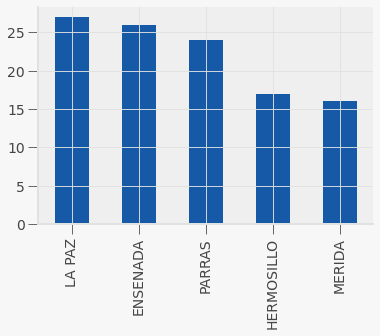

In [21]:
df[variable].value_counts().head(5).plot(kind='bar')

Variable categórica sobre el municipio sin valores nulos. El más repetido fue LA PAZ

## ACUIFERO

In [22]:
variable = 'ACUIFERO'

In [23]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna ACUIFERO es un dato tipo object con 273 valores únicos. Algunos ejemplos son: ['VALLE DE CHICALOTE' 'VALLE DE CHICALOTE' 'VALLE DE AGUASCALIENTES'
 'VALLE DE AGUASCALIENTES' 'TODOS SANTOS'] Y presenta 0.0 % valores nulos


In [24]:
df[[variable]].groupby(variable).size().sort_values(ascending=False).to_frame()

,0
ACUIFERO,
PENINSULA DE YUCATAN,119
PRINCIPAL-REGION LAGUNERA,28
ALTO ATOYAC,19
TEPEHUANES-SANTIAGO,16
GENERAL CEPEDA-SAUCEDA,12
...,...
NOCHIXTLAN,1
LAS DELICIAS,1
RIO TURBIO,1


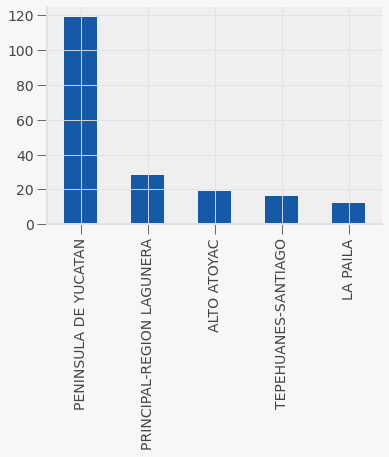

In [25]:
df[variable].value_counts().head(5).plot(kind='bar')

Categórica, sin valores nulos. 

El más repetido es la peninsula de Yucatan

## SUBTIPO

In [26]:
variable = 'SUBTIPO'

In [27]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna SUBTIPO es un dato tipo object con 8 valores únicos. Algunos ejemplos son: ['POZO' 'POZO' 'POZO' 'POZO' 'POZO'] Y presenta 0.0 % valores nulos


In [28]:
df[[variable]].groupby(variable).size().sort_values(ascending=False).to_frame()

,0
SUBTIPO,
POZO,1039
MANANTIAL,12
CENOTE,7
POZO NORIA,4
NORIA,3
BOMBEO CENOTE,1
DESCARGA,1
Pozo,1


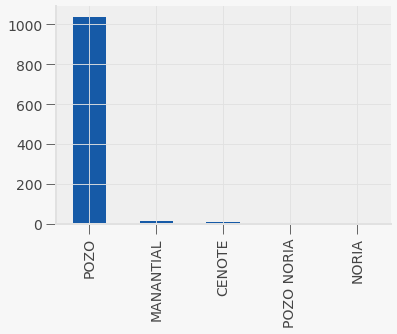

In [29]:
df[variable].value_counts().head(5).plot(kind='bar')

Categórica, sin valores nulos. 

El más repetido es el subtipo POZO

## LONGITUD & LATITUD

In [30]:
latlong=df[["LATITUD","LONGITUD"]]

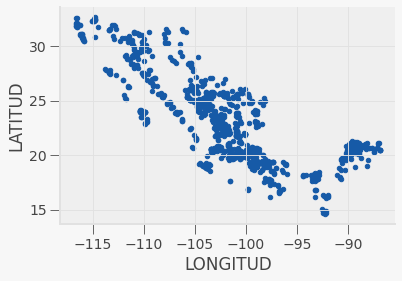

In [31]:
#extrae los datos interesantes
latlong.plot.scatter( "LONGITUD","LATITUD")

In [32]:
latlong["Coordinates"] = list(zip(latlong.LONGITUD, latlong.LATITUD))
latlong["Coordinates"] = latlong["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(latlong, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

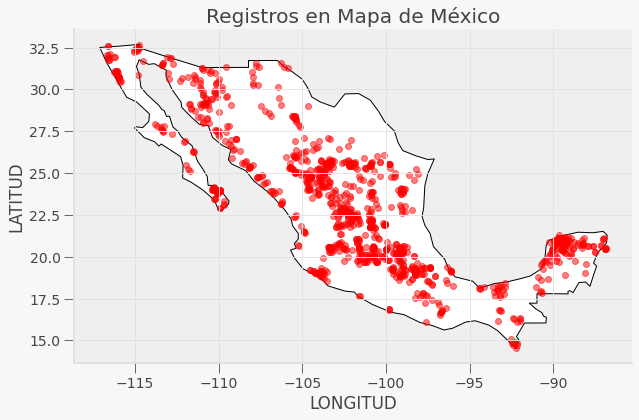

In [34]:
fig, gax = plt.subplots(figsize=(10,10))

# Mexico 
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Registros en Mapa de México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

En el mapa anterior, se observa dónde se acumulan los registros de la base

## PERIODO

In [35]:
variable = 'PERIODO'

In [36]:
df[[variable]].groupby(variable).size().sort_values(ascending=False).to_frame()

,0
PERIODO,
2020,1068


Todos los registros pertenecen al 2020

## ALC_mg/L

In [37]:
variable = 'ALC_mg/L'

In [38]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna ALC_mg/L es un dato tipo float64 con 816 valores únicos. Algunos ejemplos son: [229.99  231.99  204.92  327.    309.885] Y presenta 0.38 % valores nulos


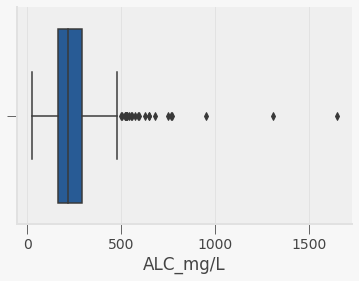

In [39]:
sns.boxplot(x=df[variable])

In [40]:
df[[variable]].describe() # Descripción de la distribución de la variable

,ALC_mg/L
count,1064.000000
mean,235.633759
std,116.874291
min,26.640000
25%,164.000000
50%,215.527500
75%,292.710000
max,1650.000000


Con lo anterior, no encontramos diferencias significativas entre la media y mediana, decidimos utilizar la media como forma de de asignar valores nulos

In [41]:
valor = df[variable].mean() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_ALC

In [42]:
variable = 'CALIDAD_ALC'

In [43]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_ALC es un dato tipo object con 4 valores únicos. Algunos ejemplos son: ['Alta' 'Alta' 'Alta' 'Alta' 'Alta'] Y presenta 0.38 % valores nulos


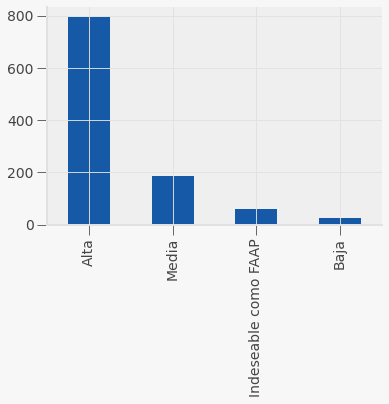

In [44]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [45]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CONDUCT_mS/cm

In [46]:
variable = 'CONDUCT_mS/cm'

In [47]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CONDUCT_mS/cm es un dato tipo float64 con 801 valores únicos. Algunos ejemplos son: [ 940.  608.  532.  686. 1841.] Y presenta 0.56 % valores nulos


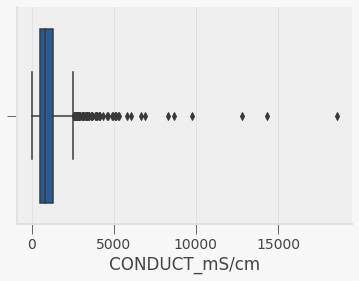

In [48]:
sns.boxplot(x=df[variable])

In [49]:
df[[variable]].describe() # Descripción de la distribución de la variable

,CONDUCT_mS/cm
count,1062.000000
mean,1138.953013
std,1245.563674
min,50.400000
25%,501.750000
50%,815.000000
75%,1322.750000
max,18577.000000


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [50]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_CONDUC

In [51]:
variable = 'CALIDAD_CONDUC'

In [52]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_CONDUC es un dato tipo object con 5 valores únicos. Algunos ejemplos son: ['Permisible para riego' 'Buena para riego' 'Buena para riego'
 'Buena para riego' 'Permisible para riego'] Y presenta 0.56 % valores nulos


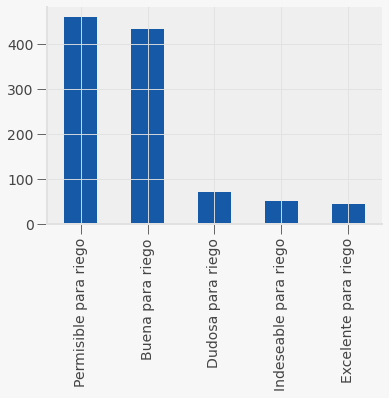

In [53]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [54]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## SDT_mg/L

In [55]:
variable = 'SDT_mg/L'

In [56]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna SDT_mg/L es un dato tipo float64 con 0 valores únicos. Algunos ejemplos son: [nan nan nan nan nan] Y presenta inf % valores nulos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  


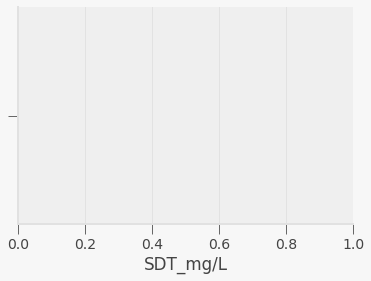

In [57]:
sns.boxplot(x=df[variable])

In [58]:
df[[variable]].describe() # Descripción de la distribución de la variable

,SDT_mg/L
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


Todos los valores son nulos, se elimina la variable

In [59]:
df = df.drop(columns=[variable])

## SDT_M_mg/L

In [60]:
variable = 'SDT_M_mg/L'

In [61]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna SDT_M_mg/L es un dato tipo object con 925 valores únicos. Algunos ejemplos son: ['603.6' '445.4' '342' '478.6' '1179'] Y presenta 0.19 % valores nulos


In [62]:
df[variable] = np.where(df[variable]=="<25", 0, df[variable])

In [63]:
df[variable] = df[variable].astype("double")

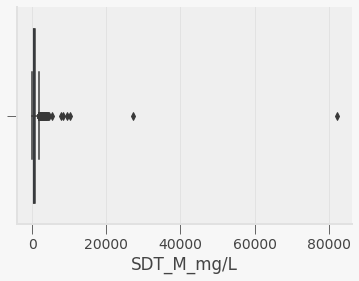

In [64]:
sns.boxplot(x=df[variable])

In [65]:
df[[variable]].describe() # Descripción de la distribución de la variable

,SDT_M_mg/L
count,1065.000000
mean,896.919502
std,2752.693639
min,101.200000
25%,337.800000
50%,550.800000
75%,916.200000
max,82170.000000


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [66]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_SDT_ra

In [67]:
variable = 'CALIDAD_SDT_ra'

In [68]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_SDT_ra es un dato tipo object con 5 valores únicos. Algunos ejemplos son: ['Cultivos sensibles' 'Excelente para riego' 'Excelente para riego'
 'Excelente para riego' 'Cultivos con manejo especial'] Y presenta 0.19 % valores nulos


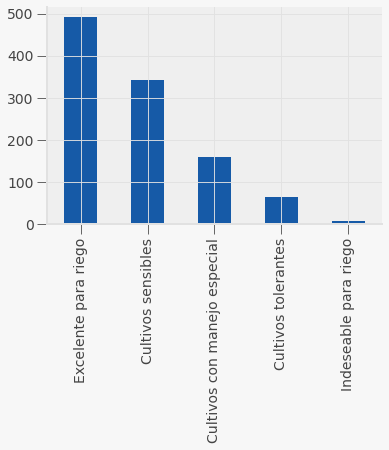

In [69]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [70]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_SDT_salin

In [71]:
variable = 'CALIDAD_SDT_salin'

In [72]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_SDT_salin es un dato tipo object con 4 valores únicos. Algunos ejemplos son: ['Potable - Dulce' 'Potable - Dulce' 'Potable - Dulce' 'Potable - Dulce'
 'Ligeramente salobres'] Y presenta 0.19 % valores nulos


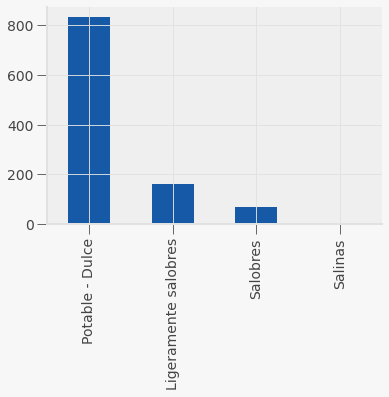

In [73]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [74]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## FLUORUROS_mg/L

In [75]:
variable = 'FLUORUROS_mg/L'

In [76]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna FLUORUROS_mg/L es un dato tipo object con 862 valores únicos. Algunos ejemplos son: ['0.9766' '0.9298' '1.8045' '1.1229' '0.2343'] Y presenta 0.0 % valores nulos


In [77]:
df[variable] = np.where(df[variable]=="<0.2", 0, df[variable])

In [78]:
df[variable] = df[variable].astype("double")

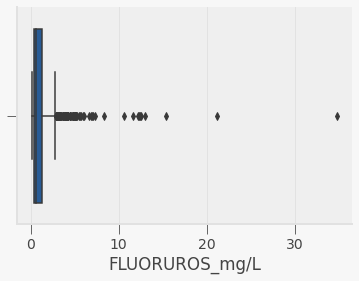

In [79]:
sns.boxplot(x=df[variable])

In [80]:
df[[variable]].describe() # Descripción de la distribución de la variable

,FLUORUROS_mg/L
count,906.000000
mean,1.232164
std,2.050341
min,0.200800
25%,0.356200
50%,0.635100
75%,1.344425
max,34.803300


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [81]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_FLUO

In [82]:
variable = 'CALIDAD_FLUO'

In [83]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_FLUO es un dato tipo object con 4 valores únicos. Algunos ejemplos son: ['Potable - Optima' 'Potable - Optima' 'Alta' 'Potable - Optima' 'Baja'] Y presenta 0.0 % valores nulos


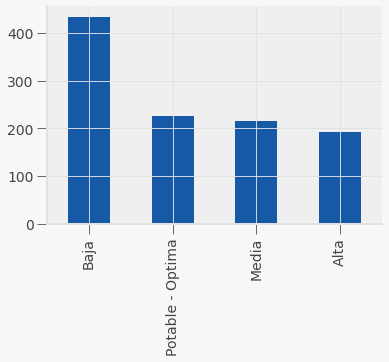

In [84]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [85]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## DUR_mg/L

In [99]:
variable = 'DUR_mg/L'

In [87]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna DUR_mg/L es un dato tipo object con 889 valores únicos. Algunos ejemplos son: ['213.732' '185.0514' '120.719' '199.879' '476.9872'] Y presenta 0.09 % valores nulos


In [89]:
df[variable] = np.where(df[variable]=="<20", 0, df[variable])

In [90]:
df[variable] = df[variable].astype("double")

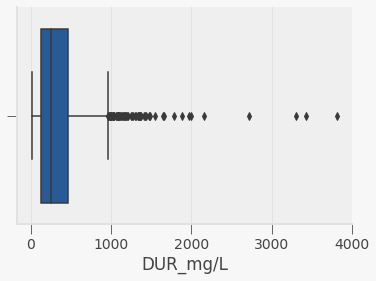

In [91]:
sns.boxplot(x=df[variable])

In [92]:
df[[variable]].describe() # Descripción de la distribución de la variable

,DUR_mg/L
count,1041.000000
mean,356.128649
std,360.333780
min,21.940600
25%,126.310000
50%,256.000000
75%,460.000000
max,3810.692200


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [93]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_DUR

In [94]:
variable = 'CALIDAD_DUR'

In [95]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_DUR es un dato tipo object con 4 valores únicos. Algunos ejemplos son: ['Potable - Dura' 'Potable - Dura' 'Potable - Dura' 'Potable - Dura'
 'Potable - Dura'] Y presenta 0.09 % valores nulos


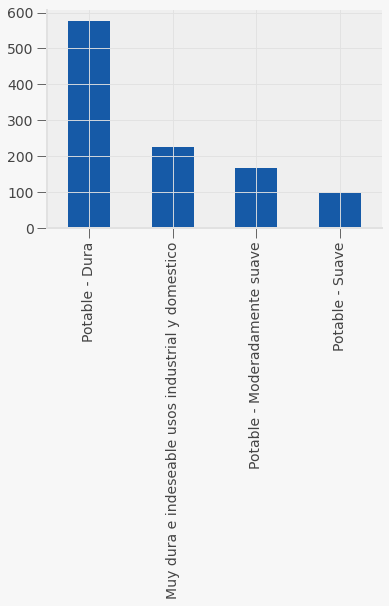

In [96]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [97]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## COLI_FEC_NMP/100_mL

In [100]:
variable = 'COLI_FEC_NMP/100_mL'

In [101]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna COLI_FEC_NMP/100_mL es un dato tipo object con 125 valores únicos. Algunos ejemplos son: ['<1.1' '<1.1' '<1.1' '<1.1' '291'] Y presenta 0.0 % valores nulos


In [102]:
df[variable] = np.where(df[variable]=="<1.1", 0, df[variable])

In [103]:
df[variable] = df[variable].astype("double")

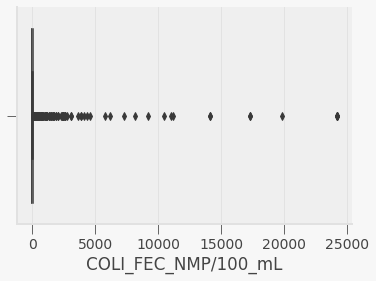

In [104]:
sns.boxplot(x=df[variable])

In [105]:
df[[variable]].describe() # Descripción de la distribución de la variable

,COLI_FEC_NMP/100_mL
count,1068.000000
mean,354.731273
std,2052.588264
min,0.000000
25%,0.000000
50%,0.000000
75%,13.250000
max,24196.000000


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [106]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_COLI_FEC

In [107]:
variable = 'CALIDAD_COLI_FEC'

In [108]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_COLI_FEC es un dato tipo object con 5 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Aceptable'] Y presenta 0.0 % valores nulos


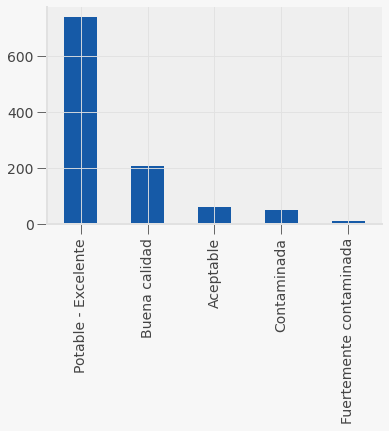

In [109]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [110]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## N_NO3_mg/L

In [111]:
variable = 'N_NO3_mg/L'

In [112]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna N_NO3_mg/L es un dato tipo object con 995 valores únicos. Algunos ejemplos son: ['4.184656' '5.75011' '1.449803' '1.258597' '15.672251'] Y presenta 0.09 % valores nulos


In [114]:
df[variable] = np.where(df[variable]=="<0.02", 0, df[variable])

In [115]:
df[variable] = df[variable].astype("double")

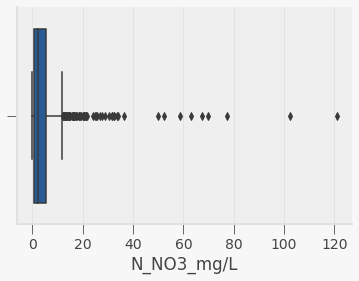

In [116]:
sns.boxplot(x=df[variable])

In [117]:
df[[variable]].describe() # Descripción de la distribución de la variable

,N_NO3_mg/L
count,1067.000000
mean,4.318540
std,8.345763
min,0.000000
25%,0.650294
50%,2.080932
75%,5.201698
max,121.007813


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [118]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_N_NO3

In [119]:
variable = 'CALIDAD_N_NO3'

In [120]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_N_NO3 es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Buena calidad' 'Potable - Excelente'
 'Potable - Excelente' 'No apta como FAAP'] Y presenta 0.09 % valores nulos


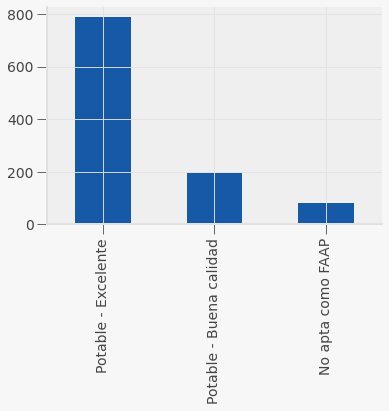

In [121]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [122]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## AS_TOT_mg/L

In [123]:
variable = 'AS_TOT_mg/L'

In [124]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna AS_TOT_mg/L es un dato tipo object con 209 valores únicos. Algunos ejemplos son: ['0.0161' '0.0134' '0.037' '0.0154' '<0.01'] Y presenta 0.0 % valores nulos


In [127]:
df[variable] = np.where(df[variable]=="<0.01", 0, df[variable])

In [128]:
df[variable] = df[variable].astype("double")

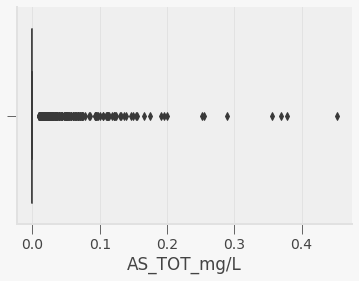

In [129]:
sns.boxplot(x=df[variable])

In [130]:
df[[variable]].describe() # Descripción de la distribución de la variable

,AS_TOT_mg/L
count,1068.000000
mean,0.011987
std,0.037480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.452200


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [131]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_AS

In [132]:
variable = 'CALIDAD_AS'

In [133]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_AS es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['Apta como FAAP' 'Apta como FAAP' 'No apta como FAAP' 'Apta como FAAP'
 'Potable - Excelente'] Y presenta 0.0 % valores nulos


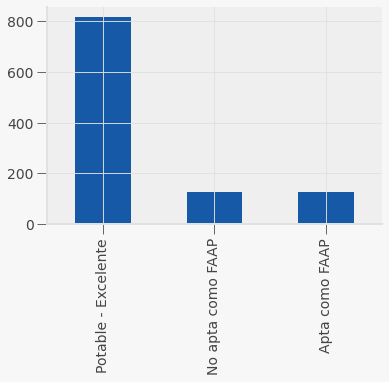

In [134]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [135]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CD_TOT_mg/L

In [136]:
variable = 'CD_TOT_mg/L'

In [137]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CD_TOT_mg/L es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['<0.003' '<0.003' '<0.003' '<0.003' '<0.003'] Y presenta 0.0 % valores nulos


In [138]:
df[variable] = np.where(df[variable]=="<0.003", 0, df[variable])

In [139]:
df[variable] = df[variable].astype("double")

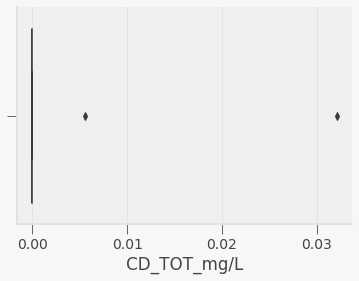

In [140]:
sns.boxplot(x=df[variable])

In [141]:
df[[variable]].describe() # Descripción de la distribución de la variable

,CD_TOT_mg/L
count,1068.000000
mean,0.000035
std,0.000997
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.032110


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [142]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_CD

In [143]:
variable = 'CALIDAD_CD'

In [144]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_CD es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Potable - Excelente'] Y presenta 0.0 % valores nulos


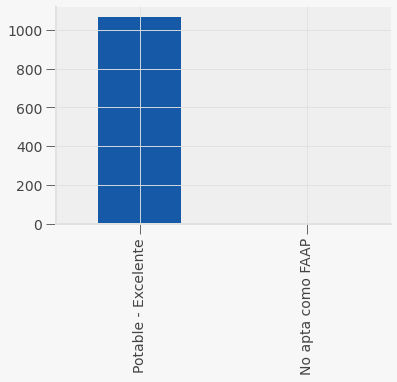

In [145]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [146]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CR_TOT_mg/L

In [147]:
variable = 'CR_TOT_mg/L'

In [148]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CR_TOT_mg/L es un dato tipo object con 168 valores únicos. Algunos ejemplos son: ['<0.005' '<0.005' '<0.005' '0.005' '<0.005'] Y presenta 0.0 % valores nulos


In [149]:
df[variable] = np.where(df[variable]=="<0.005", 0, df[variable])

In [150]:
df[variable] = df[variable].astype("double")

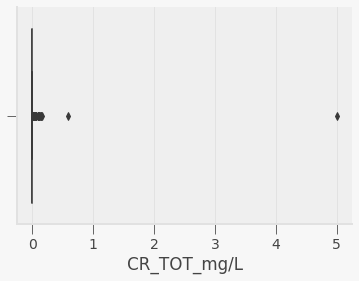

In [151]:
sns.boxplot(x=df[variable])

In [152]:
df[[variable]].describe() # Descripción de la distribución de la variable

,CR_TOT_mg/L
count,1068.000000
mean,0.009277
std,0.154619
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.003200


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [153]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_CR

In [154]:
variable = 'CALIDAD_CR'

In [155]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_CR es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Potable - Excelente'] Y presenta 0.0 % valores nulos


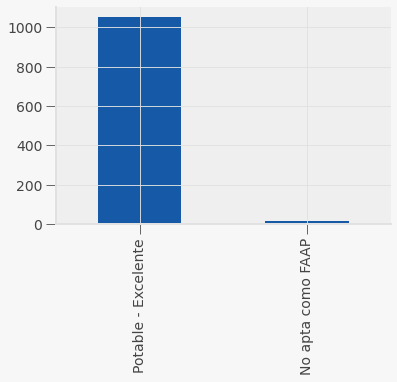

In [156]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [157]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## HG_TOT_mg/L 

In [159]:
variable = 'HG_TOT_mg/L'

In [160]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna HG_TOT_mg/L es un dato tipo object con 61 valores únicos. Algunos ejemplos son: ['<0.0005' '<0.0005' '<0.0005' '<0.0005' '<0.0005'] Y presenta 0.0 % valores nulos


In [161]:
df[variable] = np.where(df[variable]=="<0.0005", 0, df[variable])

In [162]:
df[variable] = df[variable].astype("double")

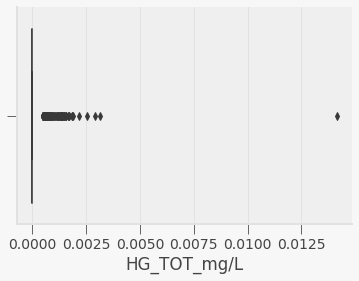

In [163]:
sns.boxplot(x=df[variable])

In [164]:
df[[variable]].describe() # Descripción de la distribución de la variable

,HG_TOT_mg/L
count,1068.000000
mean,0.000104
std,0.000540
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.014150


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [165]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_HG

In [166]:
variable = 'CALIDAD_HG'

In [167]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_HG es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Potable - Excelente'] Y presenta 0.0 % valores nulos


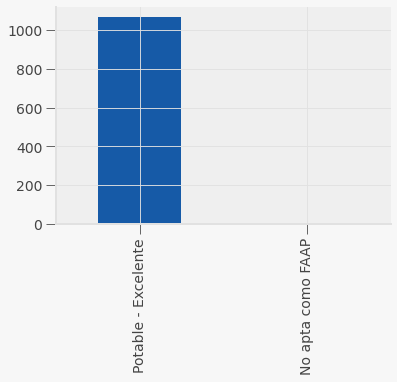

In [168]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [169]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## PB_TOT_mg/L

In [170]:
variable = 'PB_TOT_mg/L'

In [171]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna PB_TOT_mg/L es un dato tipo object con 31 valores únicos. Algunos ejemplos son: ['<0.005' '<0.005' '<0.005' '<0.005' '<0.005'] Y presenta 0.0 % valores nulos


In [173]:
df[variable] = np.where(df[variable]=="<0.005", 0, df[variable])

In [174]:
df[variable] = df[variable].astype("double")

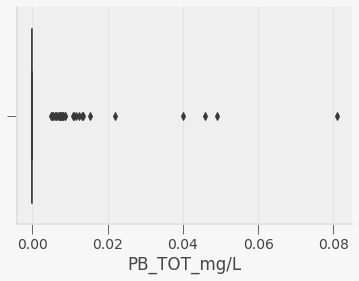

In [175]:
sns.boxplot(x=df[variable])

In [176]:
df[[variable]].describe() # Descripción de la distribución de la variable

,PB_TOT_mg/L
count,1068.000000
mean,0.000422
std,0.003743
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.080900


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [177]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_PB

In [179]:
variable = 'CALIDAD_PB'

In [180]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_PB es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Potable - Excelente'] Y presenta 0.0 % valores nulos


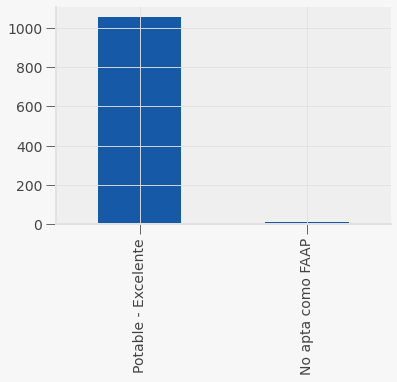

In [181]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [182]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## MN_TOT_mg/L

In [183]:
variable = 'MN_TOT_mg/L'

In [184]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna MN_TOT_mg/L es un dato tipo object con 362 valores únicos. Algunos ejemplos son: ['<0.0015' '<0.0015' '<0.0015' '<0.0015' '<0.0015'] Y presenta 0.0 % valores nulos


In [185]:
df[variable] = np.where(df[variable]=="<0.0015", 0, df[variable])

In [186]:
df[variable] = df[variable].astype("double")

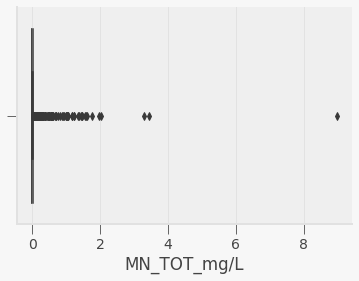

In [187]:
sns.boxplot(x=df[variable])

In [188]:
df[[variable]].describe() # Descripción de la distribución de la variable

,MN_TOT_mg/L
count,1068.000000
mean,0.071713
std,0.376658
min,0.000000
25%,0.000000
50%,0.000000
75%,0.009947
max,8.982000


Con lo anterior, observamos que existen outliers que jalan la media a valores más altos que la mediana. 

Asignamos missing values a la mediana para no afectar la distribución

In [189]:
valor = df[variable].median() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_MN

In [190]:
variable = 'CALIDAD_MN'

In [191]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_MN es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Potable - Excelente'] Y presenta 0.0 % valores nulos


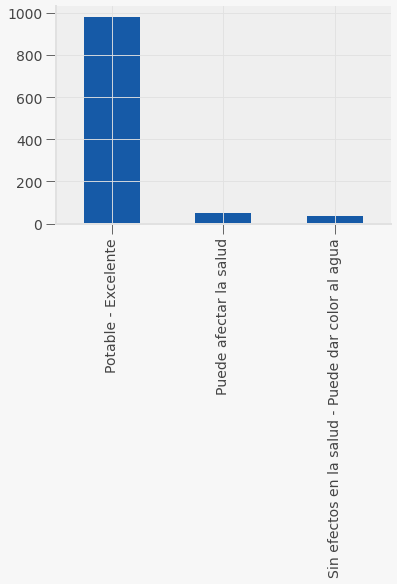

In [192]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [193]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## FE_TOT_mg/L

In [194]:
variable = 'FE_TOT_mg/L'

In [195]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna FE_TOT_mg/L es un dato tipo object con 615 valores únicos. Algunos ejemplos son: ['0.0891' '<0.025' '<0.025' '<0.025' '<0.025'] Y presenta 0.0 % valores nulos


In [196]:
df[variable] = np.where(df[variable]=="<0.025", 0, df[variable])

In [197]:
df[variable] = df[variable].astype("double")

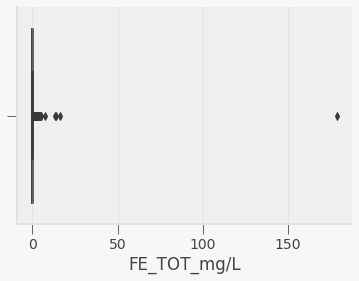

In [198]:
sns.boxplot(x=df[variable])

In [199]:
df[[variable]].describe() # Descripción de la distribución de la variable

,FE_TOT_mg/L
count,1068.000000
mean,0.401001
std,5.538641
min,0.000000
25%,0.000000
50%,0.046960
75%,0.173380
max,178.615000


Con lo anterior, observamos no existen diferencias significativas entre la media y la mediana. 

Asignamos missing values a la media.

In [200]:
valor = df[variable].mean() 
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CALIDAD_FE

In [201]:
variable = 'CALIDAD_FE'

In [202]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CALIDAD_FE es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['Potable - Excelente' 'Potable - Excelente' 'Potable - Excelente'
 'Potable - Excelente' 'Potable - Excelente'] Y presenta 0.0 % valores nulos


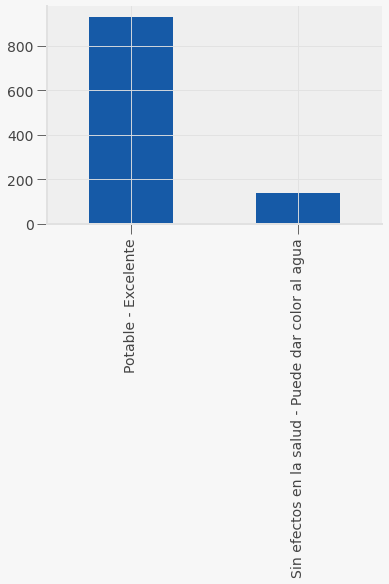

In [203]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [204]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## SEMAFORO

In [205]:
variable = 'SEMAFORO'

In [206]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna SEMAFORO es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['Verde' 'Verde' 'Rojo' 'Verde' 'Rojo'] Y presenta 0.0 % valores nulos


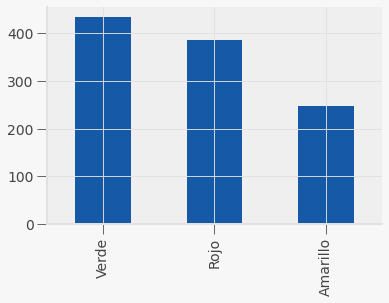

In [207]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [208]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CONTAMINANTES

In [209]:
variable = 'CONTAMINANTES'

In [210]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CONTAMINANTES es un dato tipo object con 126 valores únicos. Algunos ejemplos son: [nan nan 'FLUO,AS,' nan 'NO3,'] Y presenta 68.45 % valores nulos


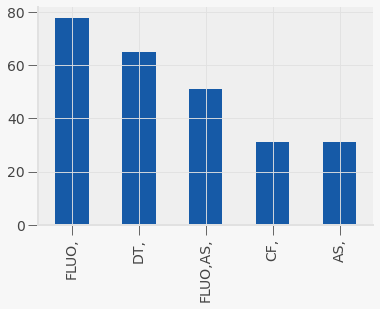

In [211]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [212]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_ALC

In [213]:
variable = 'CUMPLE_CON_ALC'

In [214]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_ALC es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


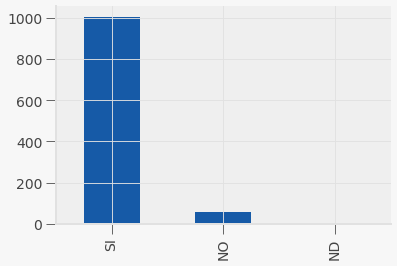

In [215]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [216]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_COND


In [217]:
variable = 'CUMPLE_CON_COND'

In [218]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_COND es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


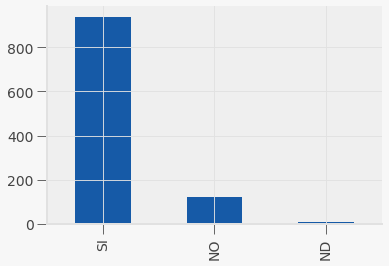

In [219]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [220]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_SDT_ra

In [221]:
variable = 'CUMPLE_CON_SDT_ra'

In [222]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_SDT_ra es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


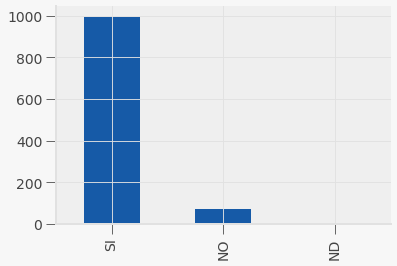

In [223]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [224]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_SDT_salin

In [225]:
variable = 'CUMPLE_CON_SDT_salin'

In [226]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_SDT_salin es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


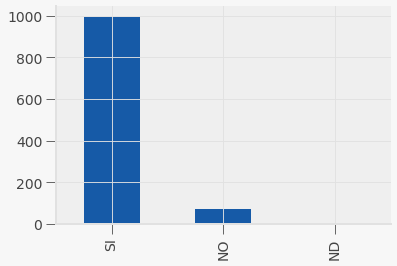

In [227]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [228]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_FLUO

In [229]:
variable = 'CUMPLE_CON_FLUO'

In [230]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_FLUO es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'NO' 'SI' 'SI'] Y presenta 0.0 % valores nulos


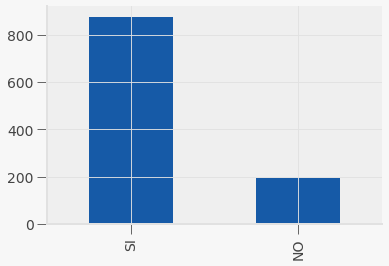

In [231]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [232]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_DUR

In [233]:
variable = 'CUMPLE_CON_DUR'

In [234]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_DUR es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


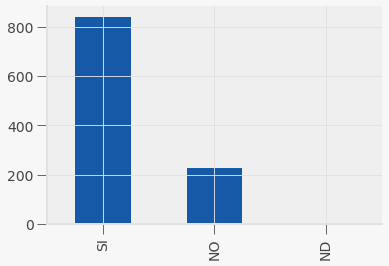

In [235]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [236]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_CF

In [237]:
variable = 'CUMPLE_CON_CF'

In [238]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_CF es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


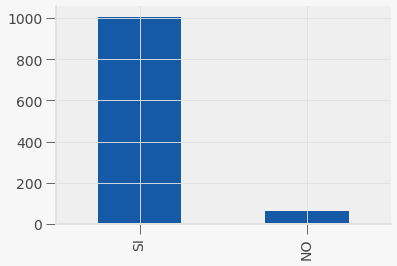

In [239]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [240]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_NO3

In [241]:
variable = 'CUMPLE_CON_NO3'

In [242]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_NO3 es un dato tipo object con 3 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'NO'] Y presenta 0.0 % valores nulos


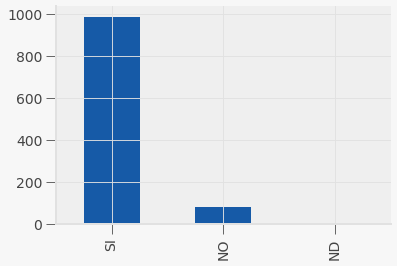

In [243]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [244]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_AS

In [245]:
variable = 'CUMPLE_CON_AS'

In [246]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_AS es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'NO' 'SI' 'SI'] Y presenta 0.0 % valores nulos


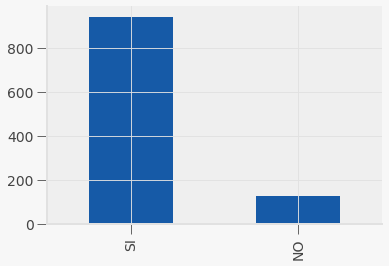

In [247]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [248]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_CD

In [249]:
variable = 'CUMPLE_CON_CD'

In [250]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_CD es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


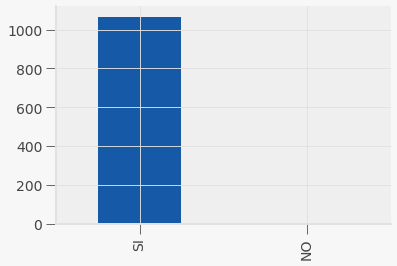

In [251]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [252]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_CR

In [253]:
variable = 'CUMPLE_CON_CR'

In [254]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_CR es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


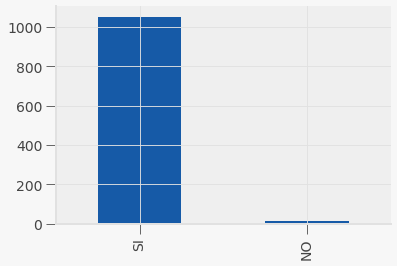

In [255]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [256]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_HG

In [257]:
variable = 'CUMPLE_CON_HG'

In [258]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_HG es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


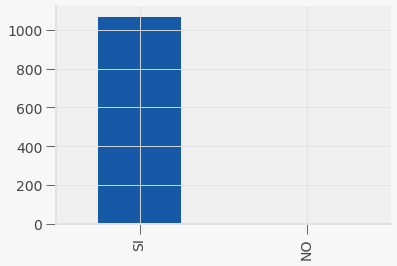

In [259]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [260]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_PB

In [261]:
variable = 'CUMPLE_CON_PB'

In [262]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_PB es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


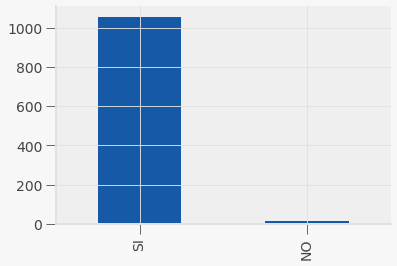

In [263]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [264]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_MN

In [267]:
variable = 'CUMPLE_CON_MN'

In [268]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_MN es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


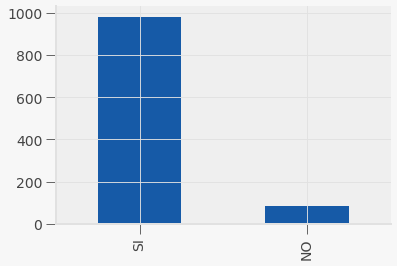

In [269]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [270]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

## CUMPLE_CON_FE

In [271]:
variable = 'CUMPLE_CON_FE'

In [272]:
for i in df[[variable]]: 
  print('Columna ' + str(i) + ' es un dato tipo ' +  str(df.dtypes[i]) + ' con ' + str(df[i].nunique()) + ' valores únicos. ' + 'Algunos ejemplos son: ' + str(np.array(df.loc[:,i][0:5])) + ' Y presenta ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +' % valores nulos' )

Columna CUMPLE_CON_FE es un dato tipo object con 2 valores únicos. Algunos ejemplos son: ['SI' 'SI' 'SI' 'SI' 'SI'] Y presenta 0.0 % valores nulos


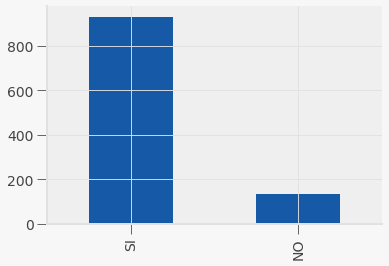

In [273]:
df[variable].value_counts().head(5).plot(kind='bar')

Al ser una variable categórica, asignamos missing values por la moda

In [274]:
valor = df[variable].mode()[0] ## Guardar la moda
df[variable] = df[variable].fillna(value=valor) ## Asignación a valores nulos

# Identificar correlaciones (sólo variables numéricas)

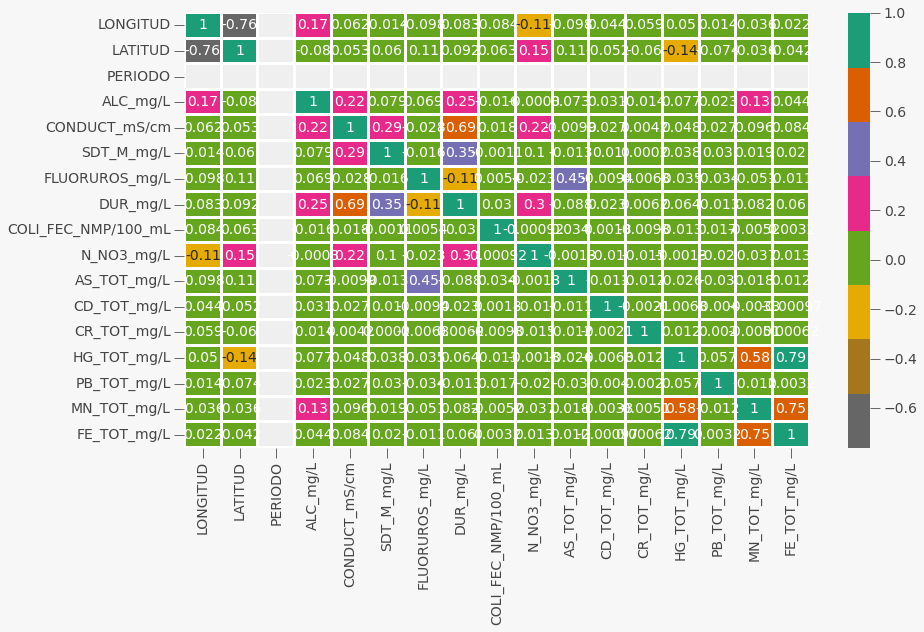

In [276]:
plt.figure(figsize=(14,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

# Escritura de Base Limpia para uso en parte 2

**Observamos el DF**

In [277]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


**Mostramos que ya no existen missing values**

In [278]:
### Iteración por columna para conocer el total de missing values
for i in df.columns: 
  print('Columna ' + str(i) + ' tiene ' +  str(df[i].isna().sum()) +' valores nulos, que representa ' + str(round((df[i].isna().sum()/df[i].count())*100,2)) +'% del total' )

Columna CLAVE tiene 0 valores nulos, que representa 0.0% del total
Columna SITIO tiene 0 valores nulos, que representa 0.0% del total
Columna ORGANISMO_DE_CUENCA tiene 0 valores nulos, que representa 0.0% del total
Columna ESTADO tiene 0 valores nulos, que representa 0.0% del total
Columna MUNICIPIO tiene 0 valores nulos, que representa 0.0% del total
Columna ACUIFERO tiene 0 valores nulos, que representa 0.0% del total
Columna SUBTIPO tiene 0 valores nulos, que representa 0.0% del total
Columna LONGITUD tiene 0 valores nulos, que representa 0.0% del total
Columna LATITUD tiene 0 valores nulos, que representa 0.0% del total
Columna PERIODO tiene 0 valores nulos, que representa 0.0% del total
Columna ALC_mg/L tiene 0 valores nulos, que representa 0.0% del total
Columna CALIDAD_ALC tiene 0 valores nulos, que representa 0.0% del total
Columna CONDUCT_mS/cm tiene 0 valores nulos, que representa 0.0% del total
Columna CALIDAD_CONDUC tiene 0 valores nulos, que representa 0.0% del total
Colum

**Escritura de base**

In [280]:
df.to_csv('/content/Datos_calidad_del_agua_subterranea_LIMPIOS.csv',index=Falseb)

# K- means para relación de calidad del agua y su ubicación

**UTilizamos la variable Semáforo para medir la calidad del agua**

In [281]:
data_k = df[['LATITUD','LONGITUD','SEMAFORO']]

**Encontrar el número óptimo de Clsuters**

In [293]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

In [294]:
sse = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(data_k[['LATITUD','LONGITUD']])
  sse.append(kmeans.inertia_)

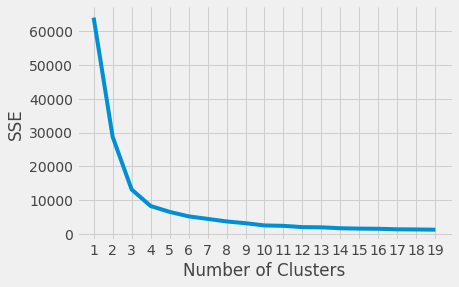

In [295]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Con la gráfica de Codo anterior, dónde se muestra la diminución del error entre las diferencias de las personas dentro de un cluster conforme aumenta el número de clusters. 

**Se decide que el número óptimo de clusters sea 4.**

In [296]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
kmeans.fit(data_k[['LATITUD','LONGITUD']])

KMeans(init='random', n_clusters=4, random_state=42)

In [297]:
kmeans.cluster_centers_

array([[  20.26914036, -100.24313245],
       [  28.7340166 , -111.44537124],
       [  24.79350197, -103.67012141],
       [  19.6502625 ,  -90.09271578]])

In [300]:
clusters = kmeans.predict(data_k[['LATITUD','LONGITUD']])
clusters

array([0, 0, 2, ..., 2, 2, 2], dtype=int32)

In [301]:
data_with_clusters = data_k.copy()
data_with_clusters['Clusters'] = clusters

In [302]:
data_with_clusters

,LATITUD,LONGITUD,SEMAFORO,Clusters
0,22.20887,-102.02210,Verde,0
1,21.99958,-102.20075,Verde,0
2,22.36685,-102.28801,Rojo,2
3,22.18435,-102.29449,Verde,0
4,23.45138,-110.24480,Rojo,1
...,...,...,...,...
1063,24.76036,-99.54191,Rojo,2
1064,24.78280,-99.70099,Rojo,2
1065,25.55197,-99.82249,Rojo,2
1066,24.80118,-100.32683,Verde,2


**Distribución de clusters**

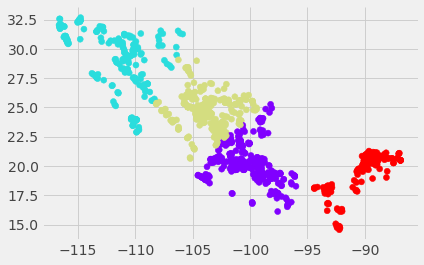

In [308]:
plt.scatter(data_with_clusters['LONGITUD'],data_with_clusters['LATITUD'],c=data_with_clusters['Clusters'],cmap='rainbow')

**Distribución de registros por semáforo**

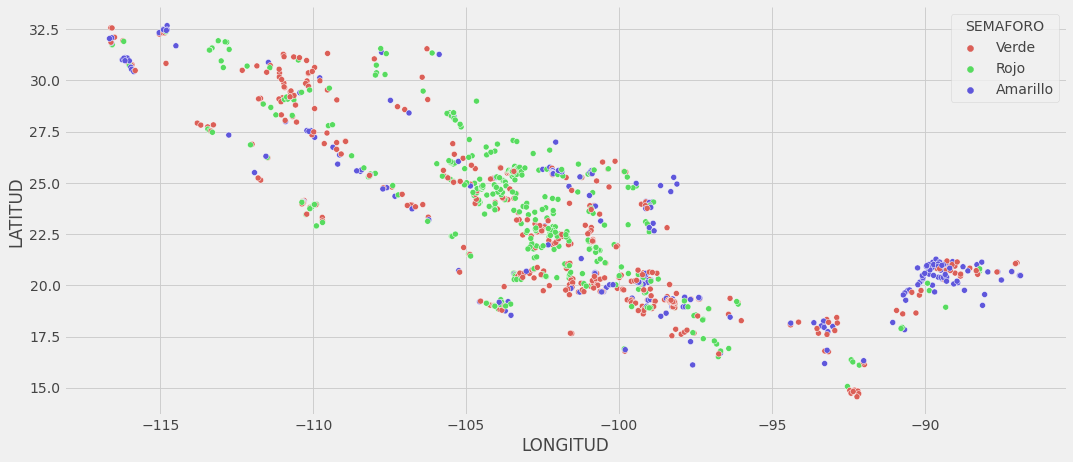

In [310]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='LONGITUD',y='LATITUD',hue='SEMAFORO',palette=sns.color_palette("hls",3),data=data_with_clusters,
               legend="full")
plt.show()

In [304]:
data_with_clusters["Coordinates"] = list(zip(data_with_clusters.LONGITUD, data_with_clusters.LATITUD))
data_with_clusters["Coordinates"] = data_with_clusters["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(data_with_clusters, geometry="Coordinates")

## Relación de cluster con calidad del agua

**Cluster 1**

In [324]:
cluster_1 = data_with_clusters[data_with_clusters['Clusters']==0]

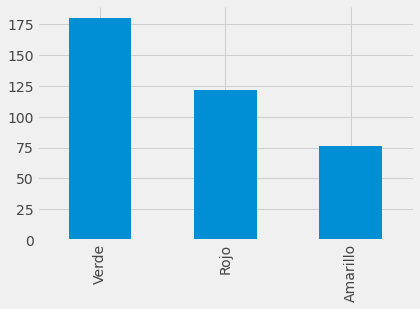

In [325]:
cluster_1['SEMAFORO'].value_counts().head(5).plot(kind='bar')

Se observa que dentro del **primer cluster**, existen más registros con calidad de agua **VERDE**

**Cluster 2**

In [315]:
cluster_2 = data_with_clusters[data_with_clusters['Clusters']==1]

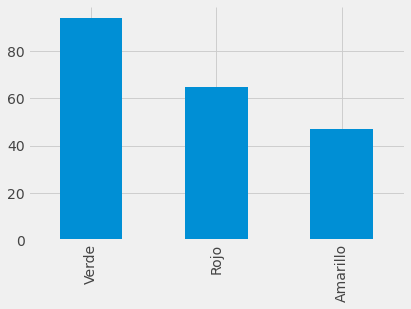

In [316]:
cluster_2['SEMAFORO'].value_counts().head(5).plot(kind='bar')

Se observa que dentro del **segundo cluster**, existen más registros con calidad de agua **VERDE**

**Cluster 3**

In [319]:
cluster_3 = data_with_clusters[data_with_clusters['Clusters']==2]

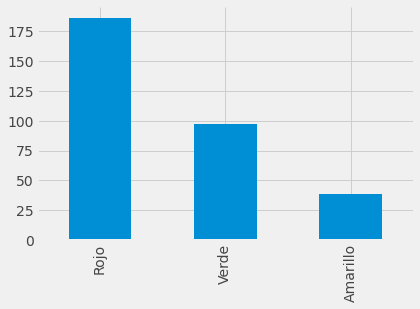

In [320]:
cluster_3['SEMAFORO'].value_counts().head(5).plot(kind='bar')

Se observa que dentro del **tercer cluster**, existen más registros con calidad de agua **ROJO**

**Cluster 4**

In [322]:
cluster_4 = data_with_clusters[data_with_clusters['Clusters']==3]

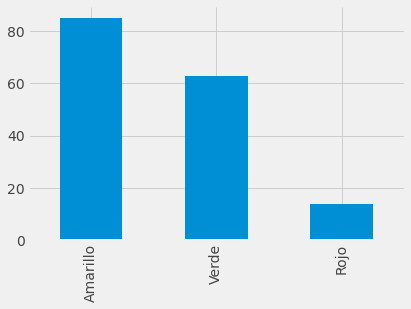

In [323]:
cluster_4['SEMAFORO'].value_counts().head(5).plot(kind='bar')

Se observa que dentro del **cuarto cluster**, existen más registros con calidad de agua **AMARILLO**

#### **Conclusiones relación calidad del agua y cluster Kmeans**

Con el análisis de agrupación de registros por k means, observamos que si existe una relación de los grupos formados con la calidad del agua. 

- El **primer clúster** acumula más registros con calidad de agua **VERDE**
- El **segundo clúster** acumula más registros con calidad de agua **VERDE**
- El **tercer clúster** acumula más registros con calidad de agua **ROJO**
- El **cuarto clúster** acumula más registros con calidad de agua **AMARILLO**


# Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México

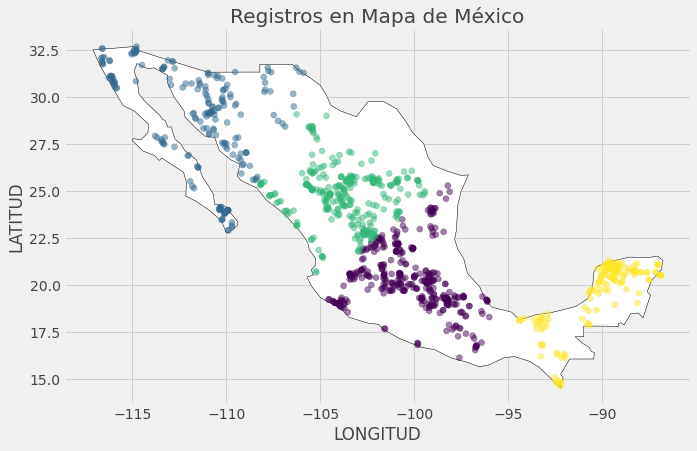

In [306]:
fig, gax = plt.subplots(figsize=(10,10))

# Mexico 
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax,c=data_with_clusters['Clusters'], alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Registros en Mapa de México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# Referencias

Capítulo 9-> Unsupervised Learning Techniques -> K means

https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb

https://realpython.com/k-means-clustering-python/



---


**FIN RETO PARTE 1**



---

